In [1]:
import pandas as pd
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout,BatchNormalization

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn

#Ignore Warnings
import warnings
warnings.simplefilter('ignore')

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Pre-processing data

In [2]:
x_train=pd.read_csv('x_train.csv').values
y_train=pd.read_csv('y_train.csv').values
x_test=pd.read_csv('x_test.csv').values
y_test=pd.read_csv('y_test.csv').values

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

# Some images and their labels from our dataset

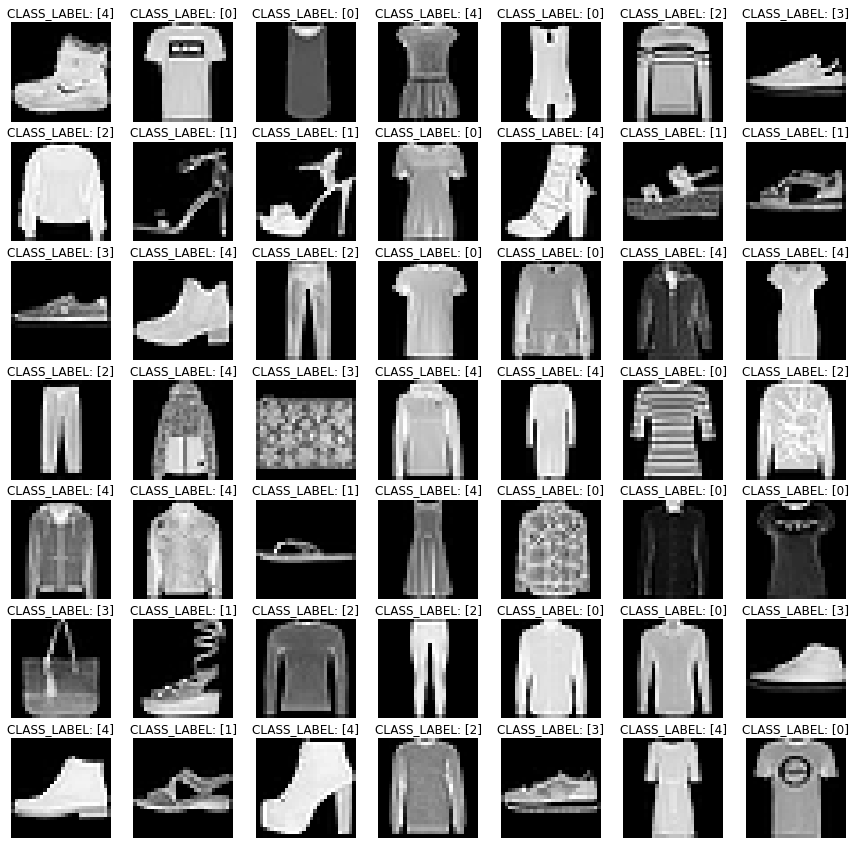

In [3]:
images = np.array(x_train, dtype='float32')
images = images.reshape(images.shape[0], 28, 28)

# Get the output labels
labels = np.array(y_train)

fig, axs = plt.subplots(7,7, figsize=(15, 15))
axs = axs.ravel()

for i in range(49):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(str('CLASS_LABEL: ')+str(labels[i]))
    axs[i].axis('off')

plt.show()

# Default CNN Model (Given Model)

In [4]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',strides=1, padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',strides=1, padding='same'))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
____________________________________________________

In [5]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='sgd',metrics=['accuracy'])

In [6]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test Accuracy is ',test_acc)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5896 - accuracy: 0.7710 - val_loss: 0.4427 - val_accuracy: 0.8334
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4002 - accuracy: 0.8552 - val_loss: 0.3846 - val_accuracy: 0.8587
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3525 - accuracy: 0.8731 - val_loss: 0.3551 - val_accuracy: 0.8718
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3231 - accuracy: 0.8851 - val_loss: 0.3258 - val_accuracy: 0.8821
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3002 - accuracy: 0.8943 - val_loss: 0.3125 - val_accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2835 - accuracy: 0.8998 - val_loss: 0.2975 - val_accuracy: 0.8929
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2699 - accuracy: 0.9043 - val_loss: 0.2965 -

Runtime Information:- The runtime for training the default CNN network was around 35 seconds for each epoch and total time for training 10 epochs was around 340 seconds and testing time is around 2 seconds.

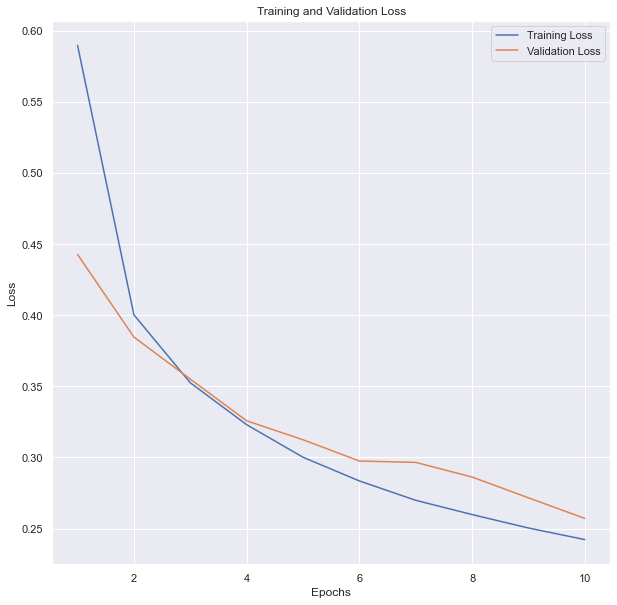

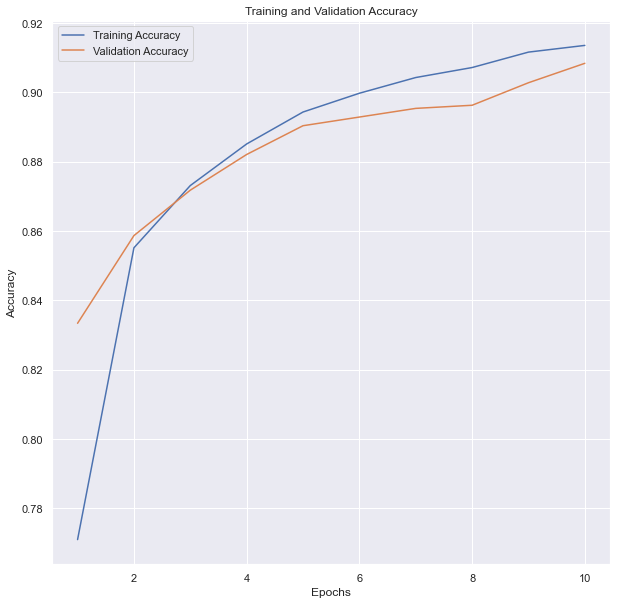

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
seaborn.set(rc={'figure.figsize':(10,10)})
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
x_train=pd.read_csv('x_train.csv').values
y_train=pd.read_csv('y_train.csv').values
x_test=pd.read_csv('x_test.csv').values
y_test=pd.read_csv('y_test.csv').values

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

# Our Own model

Explanation of our model:-

The input image is 28x28.

In our first convolutional layer we have used 128 filters with kernel size=5x5 and activation function ReLU with strides=1 and padding=’same’.Then, we have used Pooling layer Maxpooling (2x2) to reduce the spatial dimensions of feature map. Then we have used BatchNormalization and set Dropout Layer 0.2 to help prevent overfitting

In our second convolutional layer we have used 64 filters with kernel size=3x3 and activation function ReLU with strides=1.Then we have used Pooling layer Maxpooling (2x2) to reduce the spatial dimensions of feature map. Then we have used BatchNormalization and set Dropout Layer 0.2 to help prevent overfitting

In our third convolutional layer we have used 32 filters with kernel size=3x3 and activation function ReLU with padding=same.Then we have then applied BatchNormalization.

In our fourth convolutional layer we have used 16 filters with kernel size=3x3 and activation function ReLU. We have then Flattened the output.

In our penultimate layer and ultimate layer we have used dense and activation function ReLU and softmax respectively. Our ultimate layer is our final layer classifying the input images to an output class.

The optimizer used is ‘adam’.

As can be seen below the total number of parameters of the model are 101,329 and total number of trainable parameters are 100,881, the rest 448 are non-trainable parameters.

In [9]:
model=Sequential()

model.add(Conv2D(128,kernel_size=(5,5),activation = 'relu',strides=1, padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu',strides=1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(16,kernel_size=(3,3),activation = 'relu'))

model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 9, 9, 128)        512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 9, 9, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)        

In [10]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',metrics=['accuracy'])

In [11]:
history2= model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)

print('Test Accuracy is ',test_acc)

Epoch 1/10
1875/1875 [==============================] - 86s 45ms/step - loss: 0.3554 - accuracy: 0.8674 - val_loss: 0.3059 - val_accuracy: 0.8928
Epoch 2/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2439 - accuracy: 0.9109 - val_loss: 0.2487 - val_accuracy: 0.9069
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2186 - accuracy: 0.9204 - val_loss: 0.2265 - val_accuracy: 0.9178
Epoch 4/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1976 - accuracy: 0.9268 - val_loss: 0.2081 - val_accuracy: 0.9258
Epoch 5/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1857 - accuracy: 0.9316 - val_loss: 0.2091 - val_accuracy: 0.9241
Epoch 6/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1759 - accuracy: 0.9356 - val_loss: 0.1913 - val_accuracy: 0.9318
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.1682 - accuracy: 0.9381 - val_loss: 0.2109 -

Runtime information:-
The runtime for training our own model was around 85 seconds for each epoch and total time for training 10 epochs was around 840 seconds and the testing time is around 5 seconds.

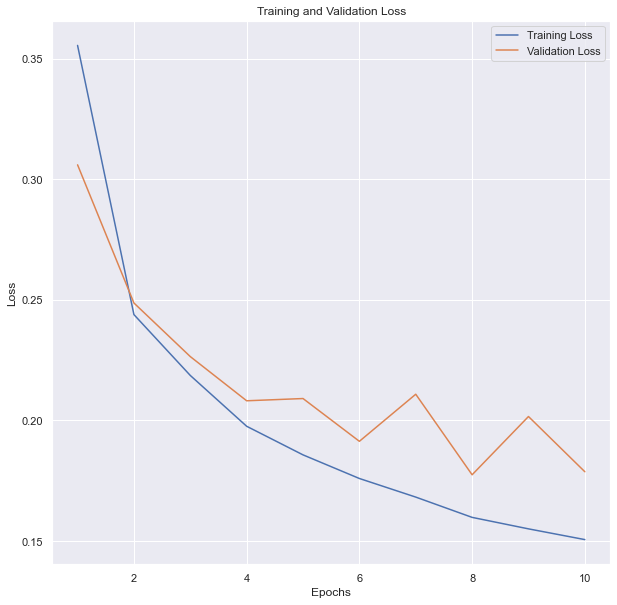

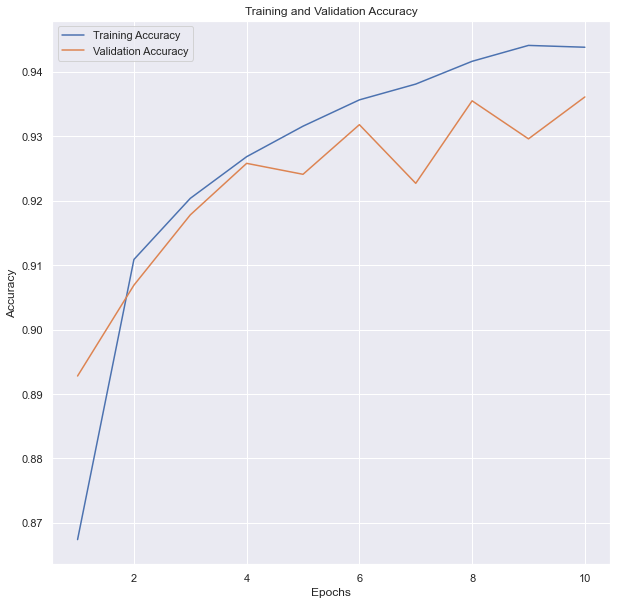

In [12]:
train_loss_own_model = history2.history['loss']
val_loss_own_model = history2.history['val_loss']

epochs = range(1, len(train_loss_own_model) + 1)
plt.plot(epochs, train_loss_own_model, label='Training Loss')
plt.plot(epochs, val_loss_own_model, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_acc_own_model = history2.history['accuracy']
val_acc_own_model = history2.history['val_accuracy']

epochs = range(1, len(train_acc_own_model) + 1)
plt.plot(epochs, train_acc_own_model, label='Training Accuracy')
plt.plot(epochs, val_acc_own_model, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1). Runtime performance for training and testing:- 

The runtime for training the default CNN network was around 35 seconds for each epoch and total time for training 10 epochs was around 340 seconds and testing time is around 2 seconds.

The runtime for training our own model was around 85 seconds for each epoch and total time for training 10 epochs was around 840 seconds and the testing time is around 5 seconds.
                                                    

2). Comparison of the different hyper-parameters or designs you tried:-

We tried changing various hyper-parameters like number of filters, activation function, filter size, optimizer and learning rate, adding or deleting dropout layer, etc.

When we changed the hyper parameters like number of filters (example changed the number of filters from 128 to 256 or from 32 to 128, etc.), filter size (changed it to (3x3) or (5x5) or (7x7), etc.) it caused the model to change the number of trainable parameters. When we increase them the number of trainable parameters increased and when there are too many trainable parameters, they caused the model to just memorize the complex patterns in the training data causing the model to overfit on the training data and the model did not do well on the testing data. Also when the number of parameters increased the training time also increased. When we changed the optimizer to 'sgd' and thereby the learning rate, we set it low so the model required more epochs to get the best accuracy. So we used to optimizer as 'adam' which has an adaptive learning rate and found that using 'adam' optimizer provided better results as compared to 'sgd' when using default settings for the learning rate. We also tried changing the activation function in the internal layer to 'softmax' instead of 'ReLU', this resulted in poor model accuracy so we kept the activation function in the internal layer as 'ReLU'. To prevent overfitting we introduced dropout layer and batchnormalization.

We also tried adding more layers to the CNN but that also increased the number of trainable parameters to increase and therefor caused the model to overfit, also when we significantly decreased the number of trainable parameters by changing the number of layers and tuning the hyper-parameter we did not get better accuaracy.

Hence, we decided to select the above model mentioned, as our final model because out of all the models that we tried and tested this model provided the optimum test accuracy while limiting the training time and preventing over fitting.
    

3).Producing a plot showing the training loss vs. training epoch for the training data and the validation data on the same plot, for each model.

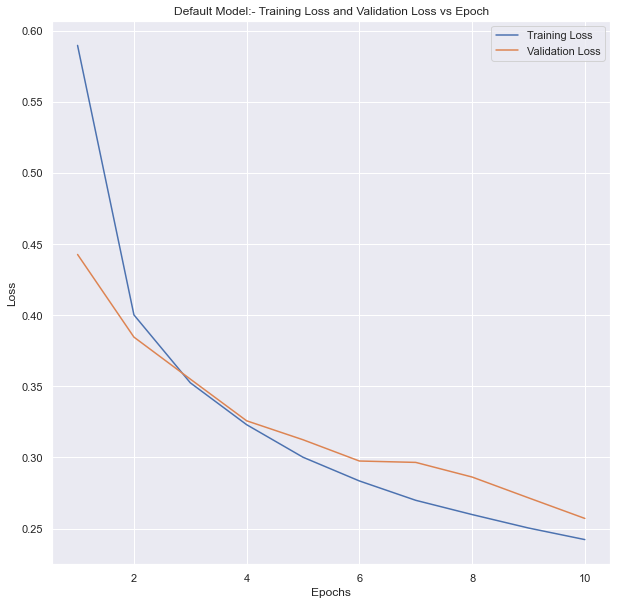

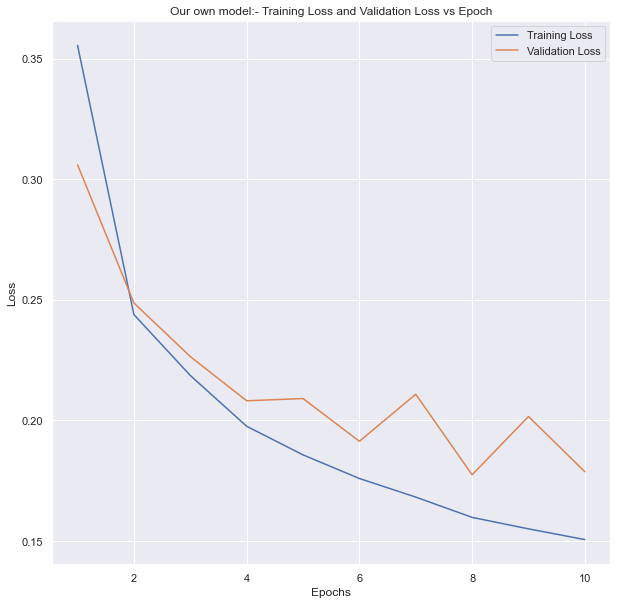

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
seaborn.set(rc={'figure.figsize':(10,10)})
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Default Model:- Training Loss and Validation Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_loss_own_model = history2.history['loss']
val_loss_own_model = history2.history['val_loss']

epochs = range(1, len(train_loss_own_model) + 1)
plt.plot(epochs, train_loss_own_model, label='Training Loss')
plt.plot(epochs, val_loss_own_model, label='Validation Loss')
plt.title('Our own model:- Training Loss and Validation Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




4).Producing another plot showing classification accuracy vs. training epoch for the training data and the validation data on the same plot, for each model.

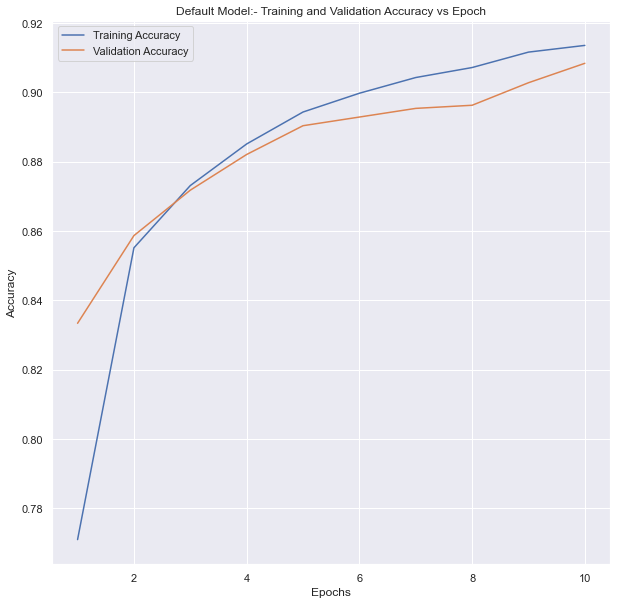

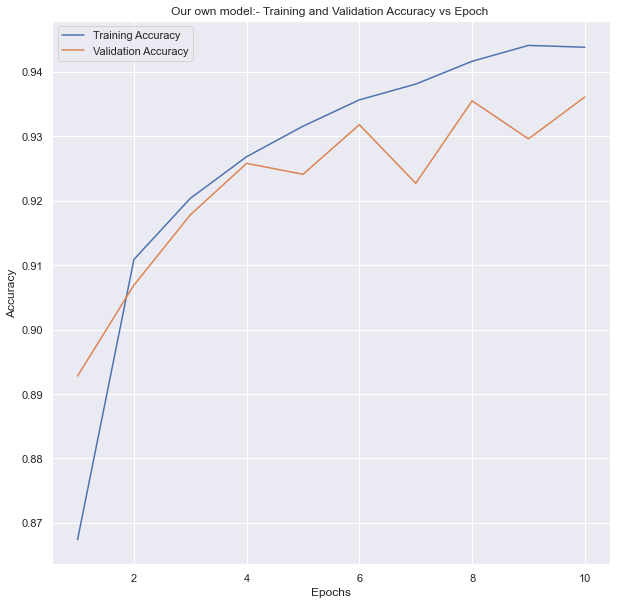

In [14]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Default Model:- Training and Validation Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


train_acc_own_model = history2.history['accuracy']
val_acc_own_model = history2.history['val_accuracy']

epochs = range(1, len(train_acc_own_model) + 1)
plt.plot(epochs, train_acc_own_model, label='Training Accuracy')
plt.plot(epochs, val_acc_own_model, label='Validation Accuracy')
plt.title('Our own model:- Training and Validation Accuracy vs Epoch ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
from keras.models import Model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [16]:
encoded_layer = Model(inputs=model.input, outputs=model.layers[11].output)
encoded_output = encoded_layer.predict(x_test)

313/313 [==============================] - 4s 14ms/step


In [17]:
pca = PCA(n_components=2)
pca1 = pca.fit_transform(encoded_output)
pca1 = pca1.astype('float32')

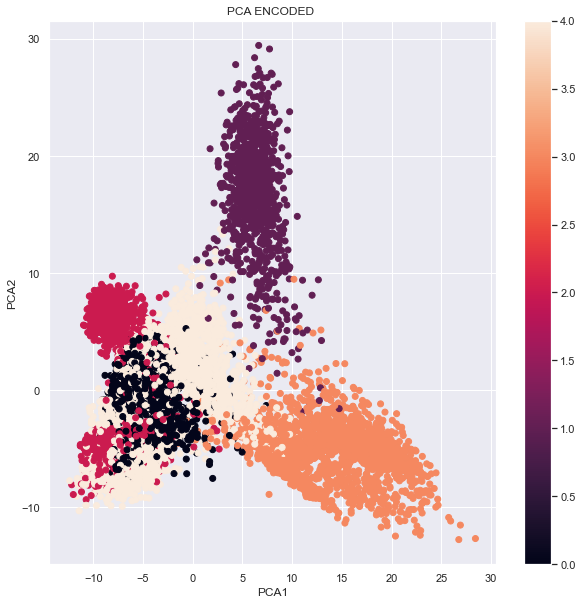

In [18]:
colors=y_test
plt.scatter(pca1[:,0], pca1[:,1],c=colors)
plt.title('PCA ENCODED ')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()

Visualization of our encoding with first two principal components from PCA. There are 5 color labels each color belonging to a single class label.

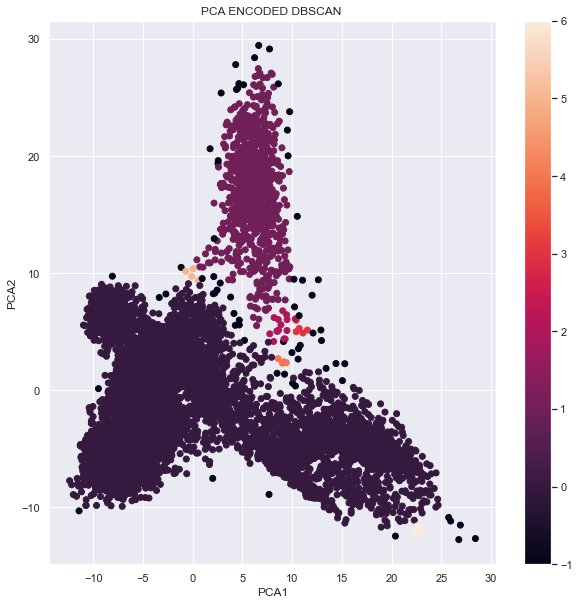

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9)
labels = dbscan.fit_predict(pca1)
plt.scatter(pca1[:,0], pca1[:,1],c=labels)
plt.title('PCA ENCODED DBSCAN ')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()

Visualization after performing DBSCAN clustering algorithm on the feature that we have extracted from our own designed model. As can be seen from the above visualization, the clustering is not as effective as required because it has a majority of datapoints belonging to only 2 clusters. There are very few datapoints that belongs to other clusters.

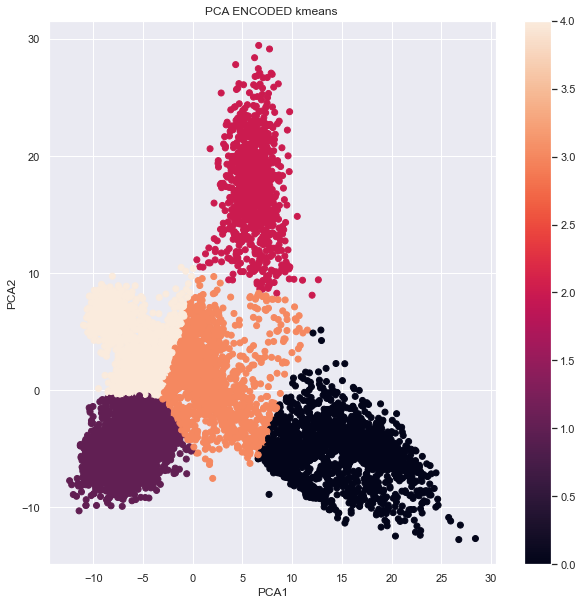

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(pca1)
plt.scatter(pca1[:,0], pca1[:,1],c=labels)
plt.title('PCA ENCODED kmeans ')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()

Visualization after performing K-Means clustering algorithm on the feature that we have extracted from our own designed model. As can be seen from the above visualization, the clustering is effective because it has clearly differentiating clusters and from the above visualization it can be observed that there are 5 clusters and the overlapping observed is also less.

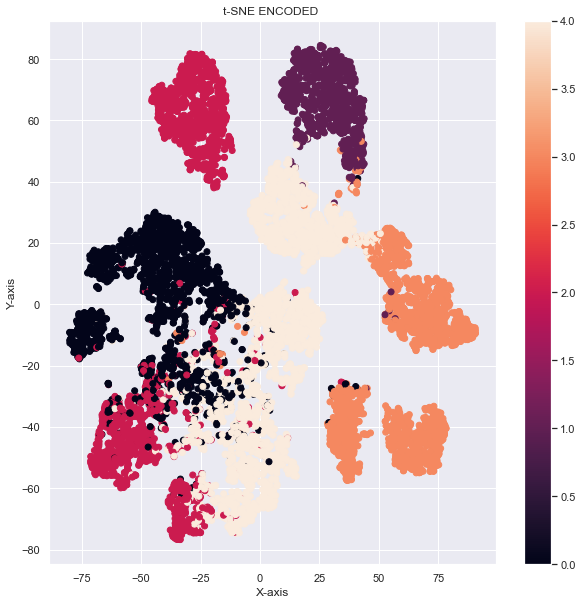

In [23]:
from sklearn.manifold import TSNE

tsne= TSNE(n_components=2)
tsne1=tsne.fit_transform(encoded_output)
colors=y_test
plt.scatter(tsne1[:,0], tsne1[:,1],c=colors)
plt.title('t-SNE ENCODED ')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()
plt.show()

Visualization of our encoding using t-SNE. There are 5 color labels each color belonging to a single class label.

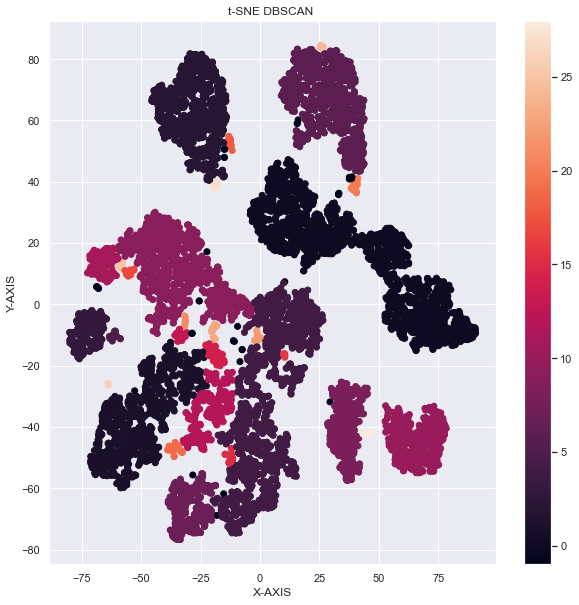

In [32]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2)
labels = dbscan.fit_predict(tsne1)
plt.scatter(tsne1[:,0], tsne1[:,1],c=labels)
plt.title('t-SNE DBSCAN ')
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.colorbar()
plt.show()

Visualization using t-SNE after performing DBSCAN clustering algorithm on the feature that we have extracted from our own designed model.

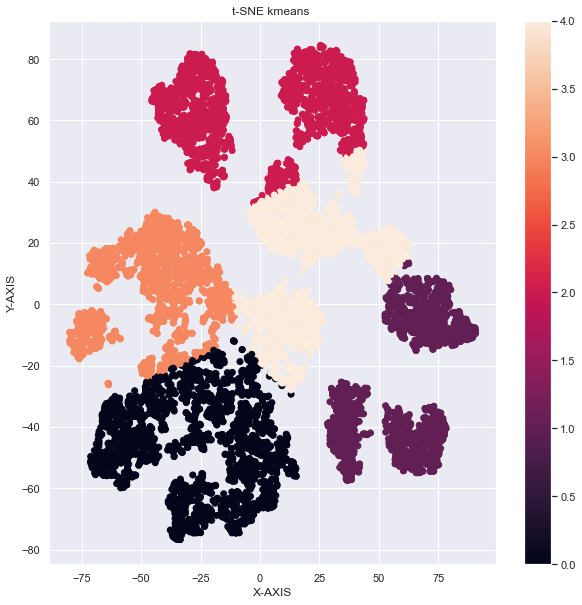

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(tsne1)
plt.scatter(tsne1[:,0], tsne1[:,1],c=labels)
plt.title('t-SNE kmeans ')
plt.xlabel('X-AXIS')
plt.ylabel('Y-AXIS')
plt.colorbar()
plt.show()

Visualization using t-SNE after performing K-Means clustering algorithm on the feature that we have extracted from our own designed model. There are 5 colors each belonging to different classes

# Original Labels

Label 0

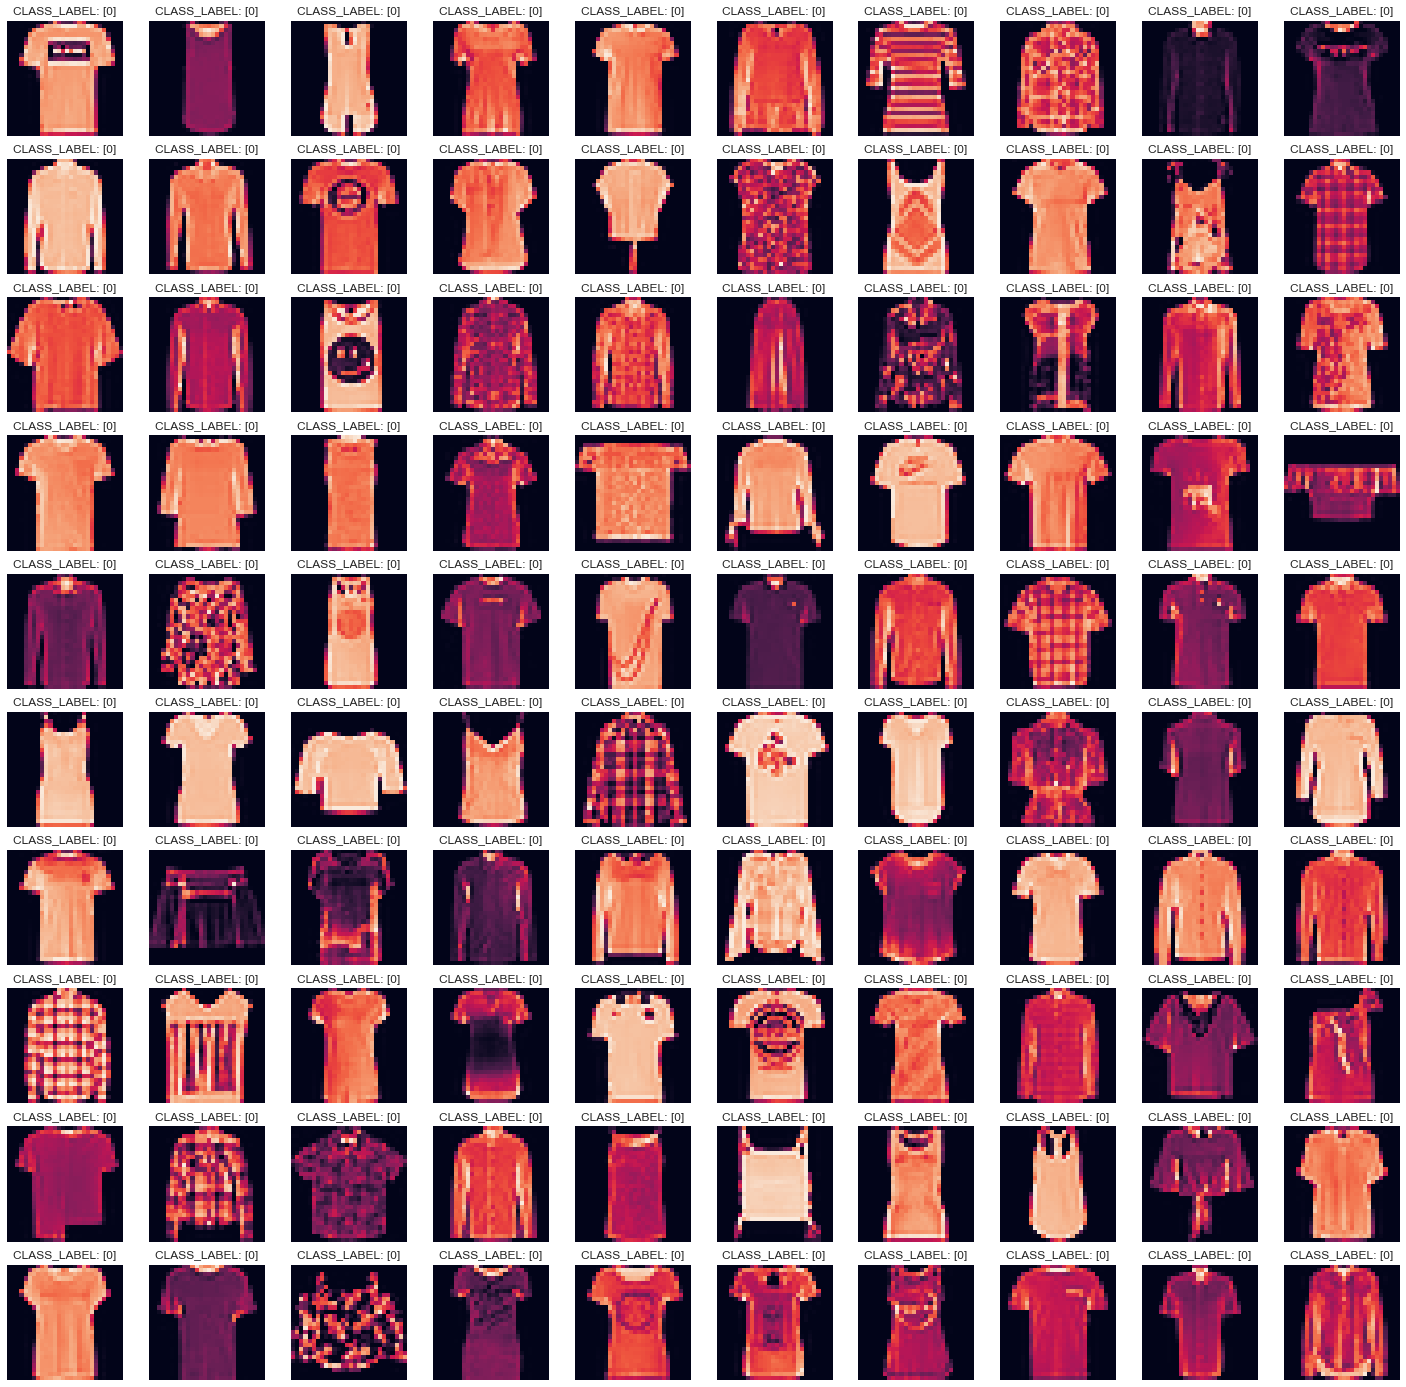

In [51]:
images = np.array(x_train, dtype='float32')
images = images.reshape(images.shape[0], 28, 28)

# Get the output labels
labels = np.array(y_train)
   
fig, axs = plt.subplots(10,10, figsize=(25,25))
axs = axs.ravel()
count = 0
for i in range(len(images)):
    if labels[i] == 0 and count < 100:
        axs[count].imshow(images[i])
        axs[count].set_title(str('CLASS_LABEL: ')+str(labels[i]))
        axs[count].axis('off')
        count = count + 1
    elif count >= 100:
        break
plt.show()

From the above image it can looks like class label 0 belongs to upper body clothing.

Label 1

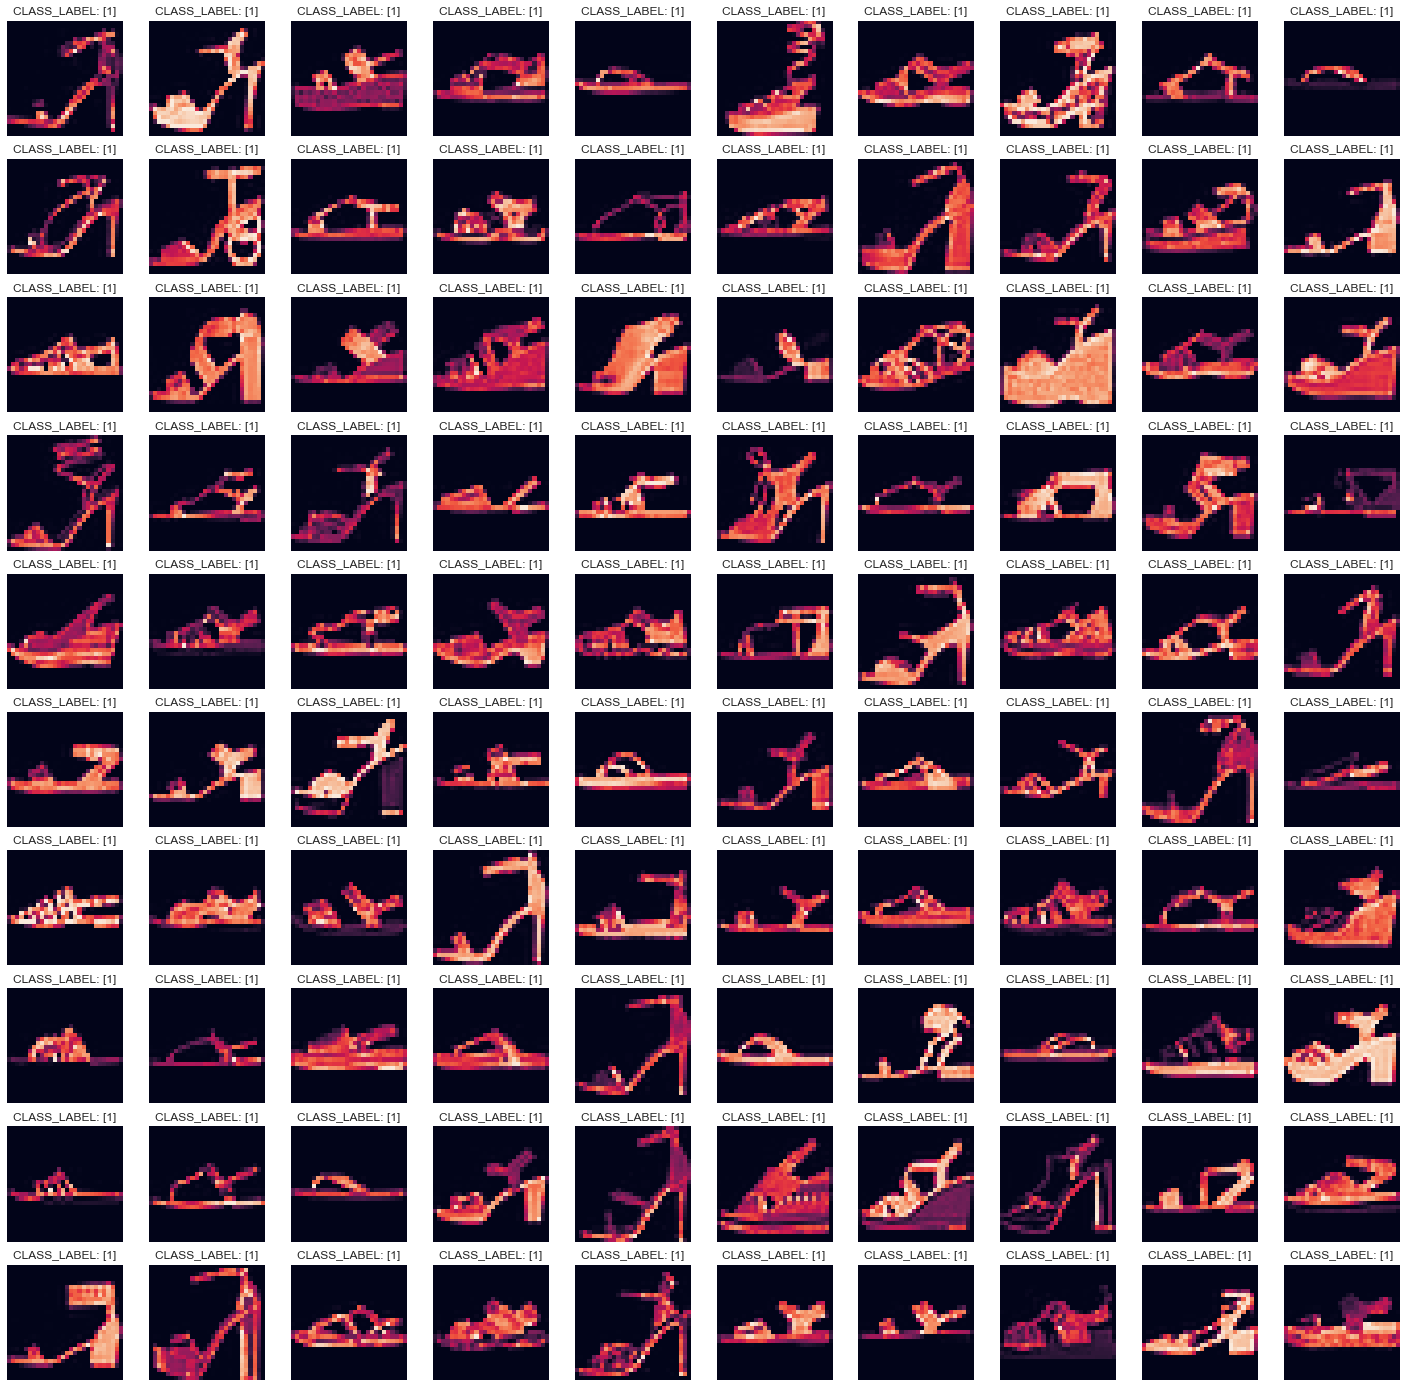

In [53]:
fig, axs = plt.subplots(10,10, figsize=(25, 25))
axs = axs.ravel()
count = 0
for i in range(len(images)):
    if labels[i] == 1 and count < 100:
        axs[count].imshow(images[i])
        axs[count].set_title(str('CLASS_LABEL: ')+str(labels[i]))
        axs[count].axis('off')
        count = count + 1
    elif count >= 100:
        break
plt.show()

From the above image it looks like Class Label 1 belongs to female footwear.

Label 2

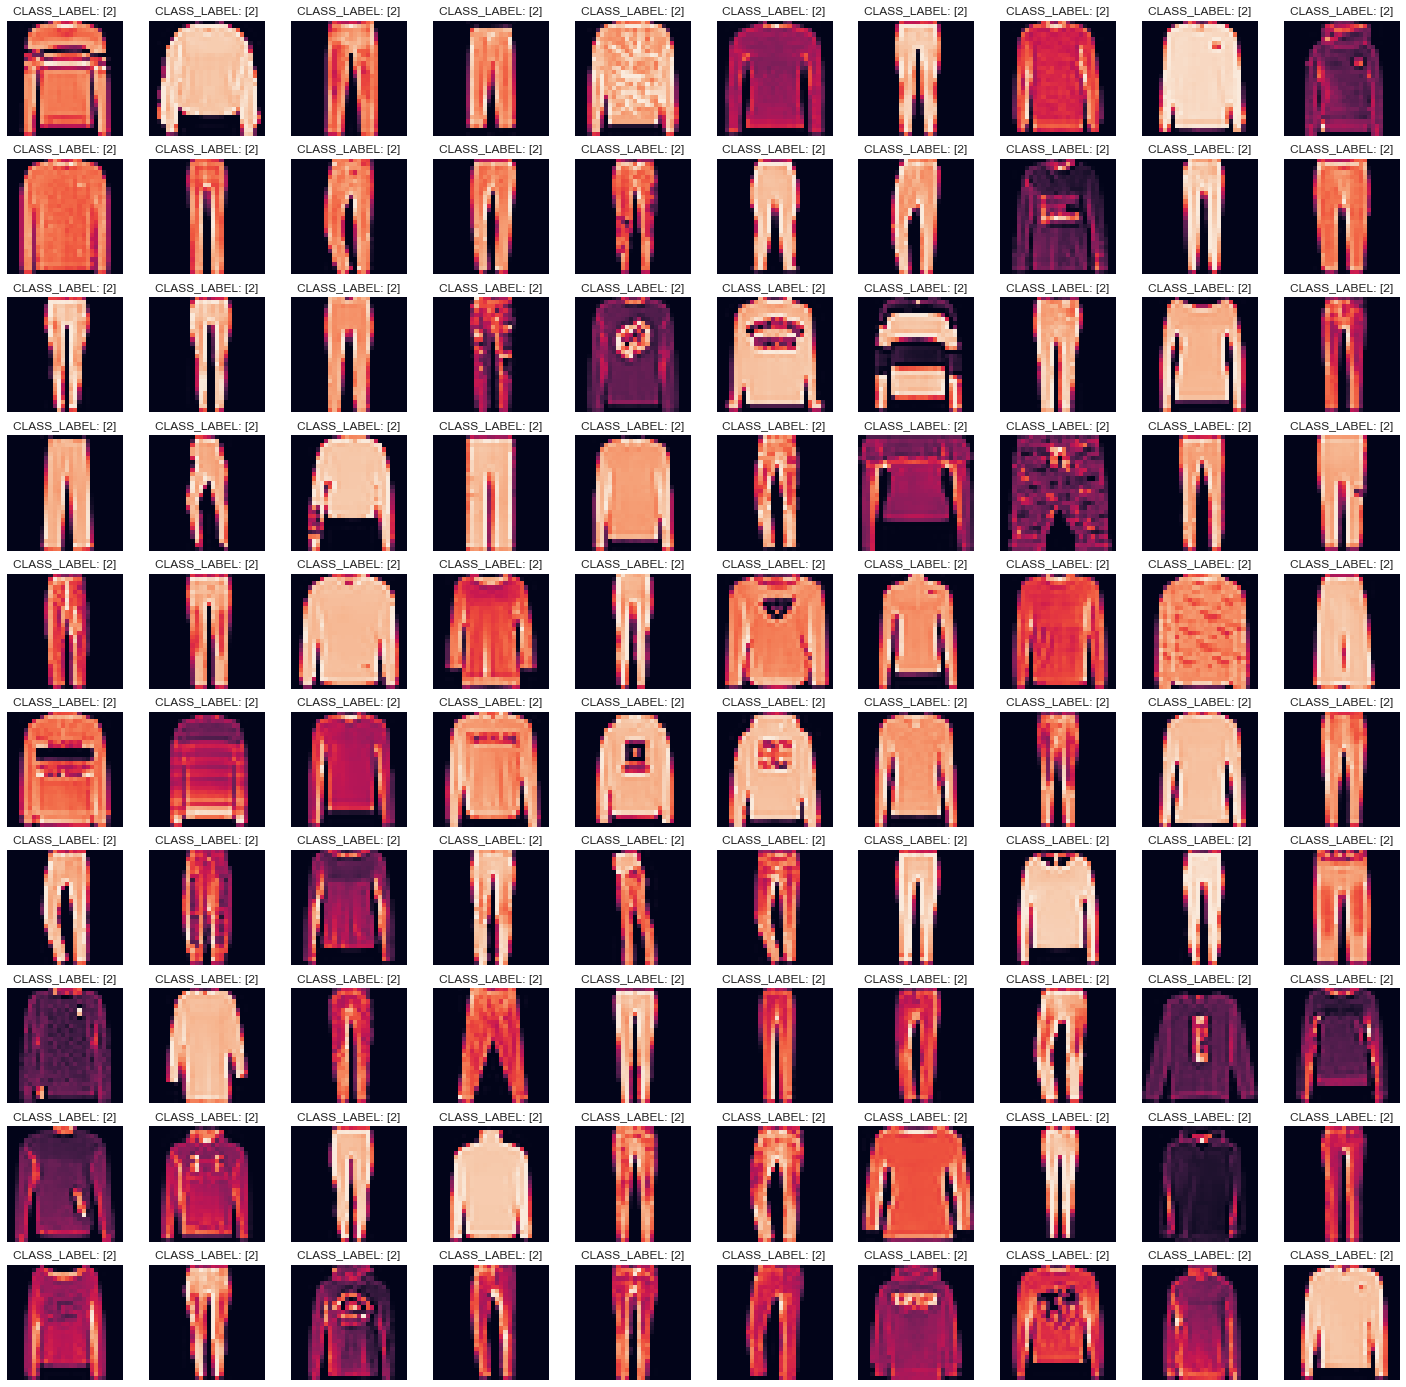

In [54]:
fig, axs = plt.subplots(10,10, figsize=(25, 25))
axs = axs.ravel()
count = 0
for i in range(len(images)):
    if labels[i] == 2 and count < 100:
        axs[count].imshow(images[i])
        axs[count].set_title(str('CLASS_LABEL: ')+str(labels[i]))
        axs[count].axis('off')
        count = count + 1
    elif count >= 100:
        break
plt.show()

From the above image it looks like Class label 2 belongs to trousers(pants) and Sweatshirts.

Label 3

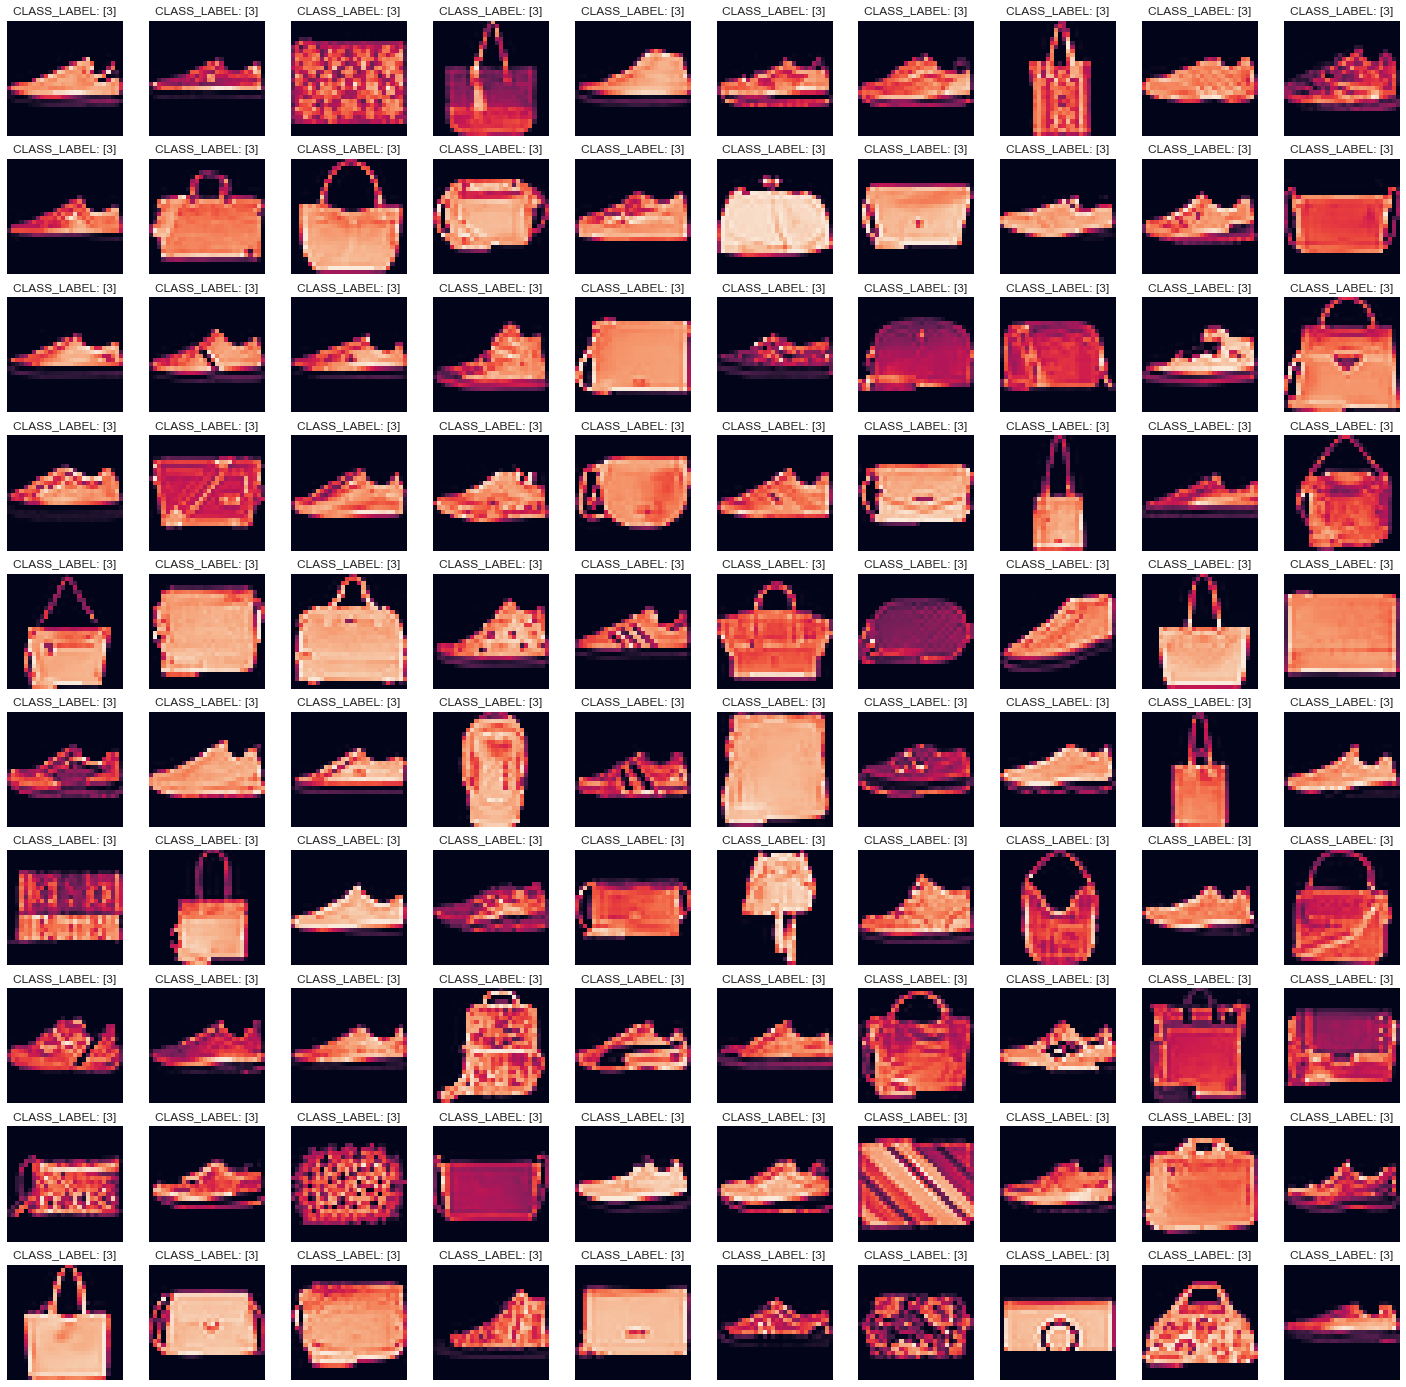

In [64]:
fig, axs = plt.subplots(10,10, figsize=(25, 25))
axs = axs.ravel()
count = 0
for i in range(len(images)):
    if labels[i] == 3 and count < 100:
        axs[count].imshow(images[i])
        axs[count].set_title(str('CLASS_LABEL: ')+str(labels[i]))
        axs[count].axis('off')
        count = count + 1
    elif count >= 100:
        break
plt.show()

From the above image it looks like Class label 3 belongs to purses and footwears.

Label 4

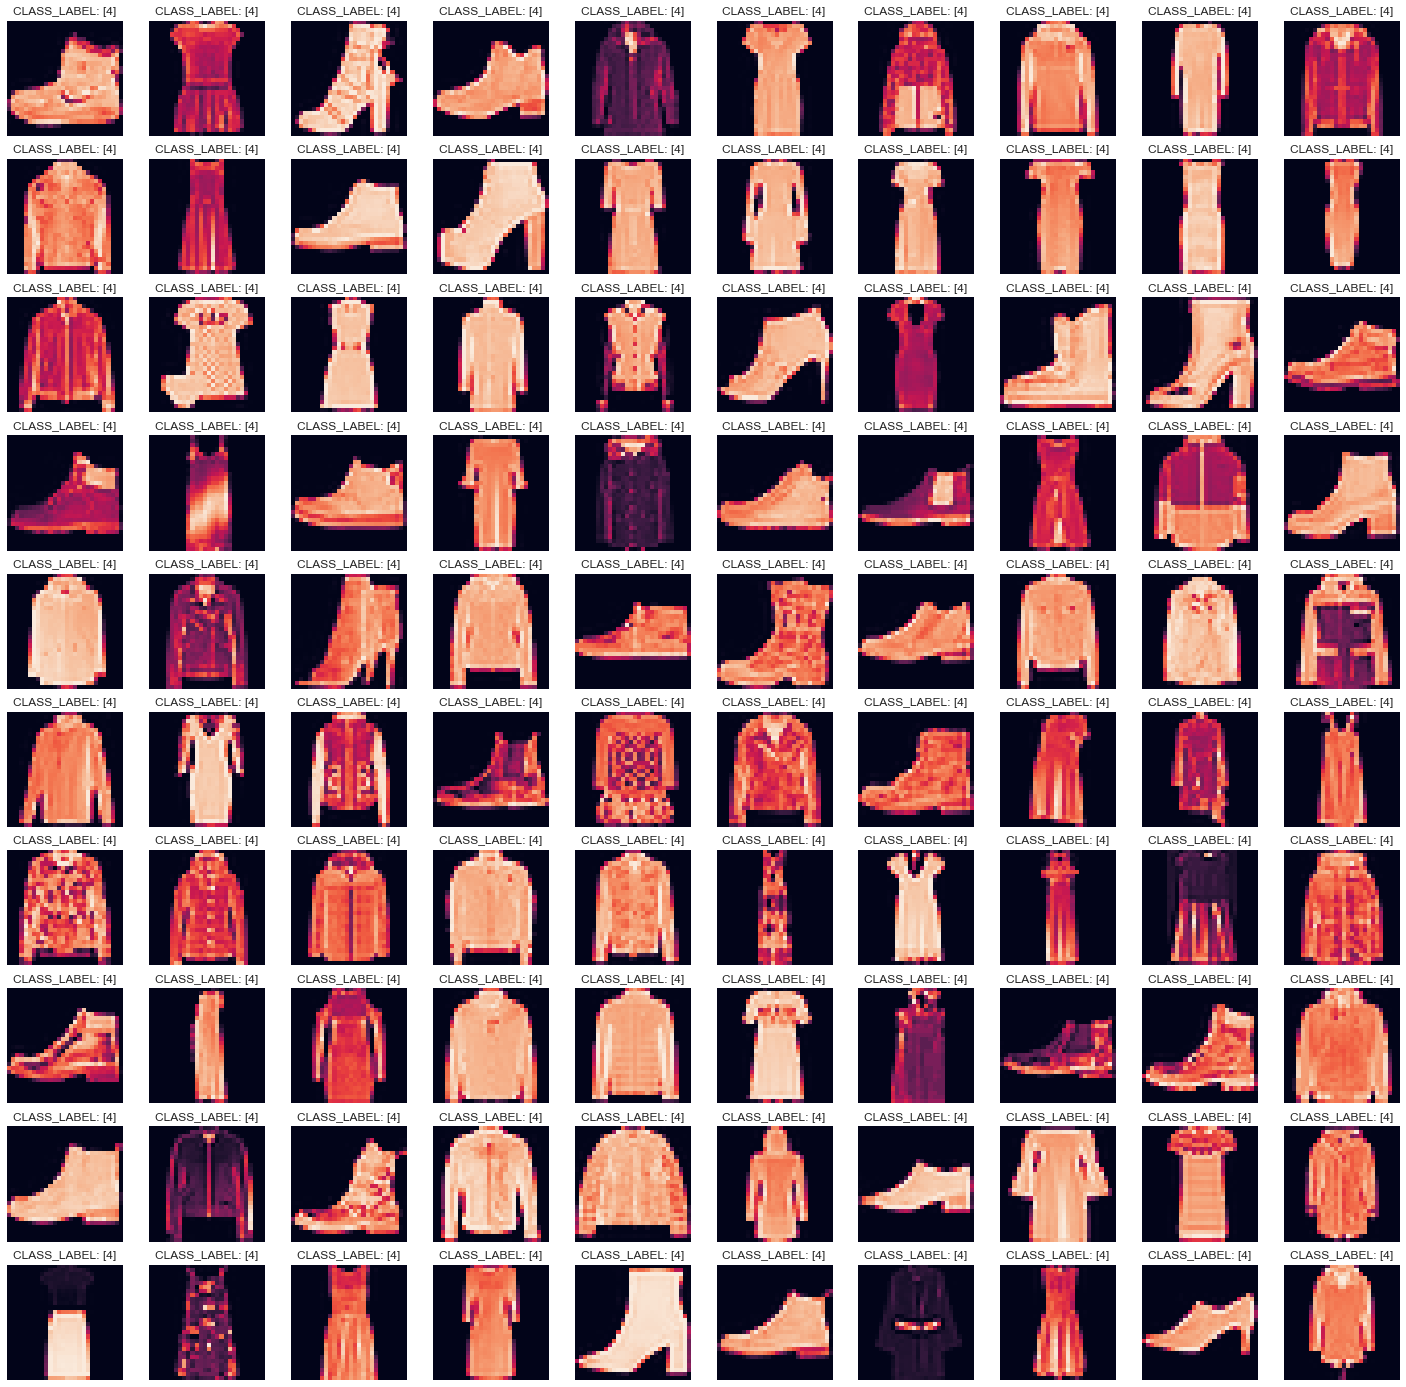

In [62]:
fig, axs = plt.subplots(10,10, figsize=(25, 25))
axs = axs.ravel()
count = 0
for i in range(len(images)):
    if labels[i] == 4 and count < 100:
        axs[count].imshow(images[i])
        axs[count].set_title(str('CLASS_LABEL: ')+str(labels[i]))
        axs[count].axis('off')
        count = count + 1
    elif count >= 100:
        break
plt.show()

From the image it is unclear as to what Class label 4 belongs to but it looks like Class Label 4 belongs to Formal Wears.

                                   Cluster 0         


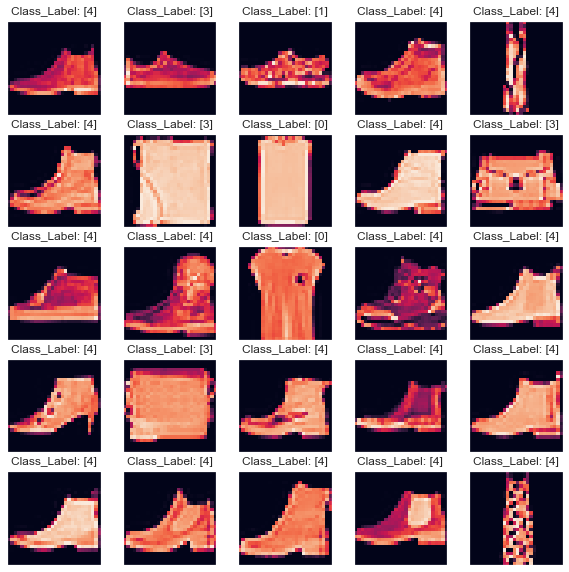

                                 Cluster 1         


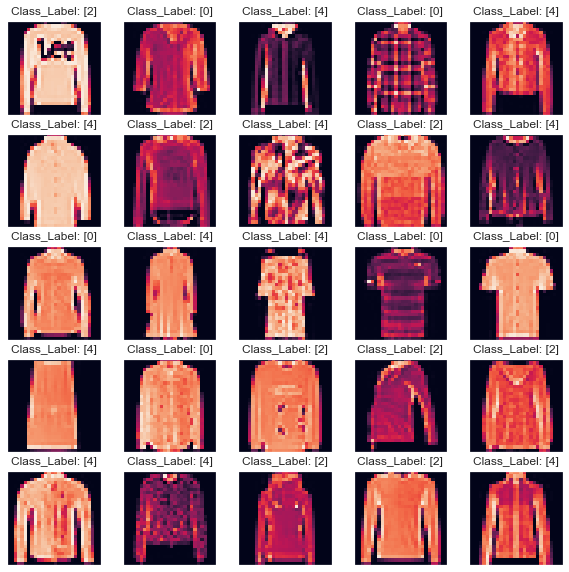

                                 Cluster 2         


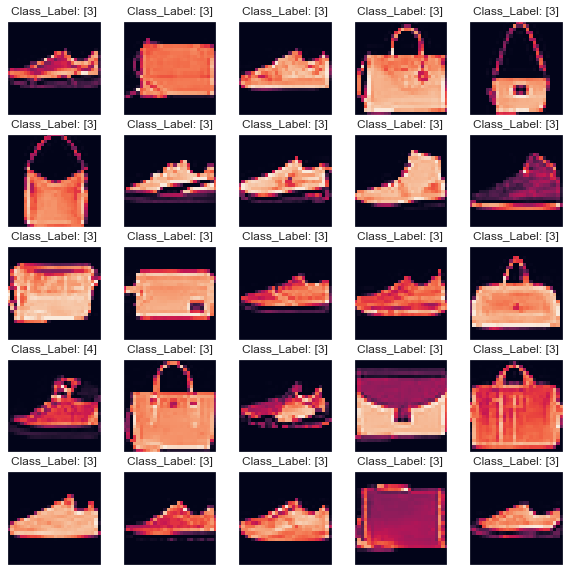

                                 Cluster 3         


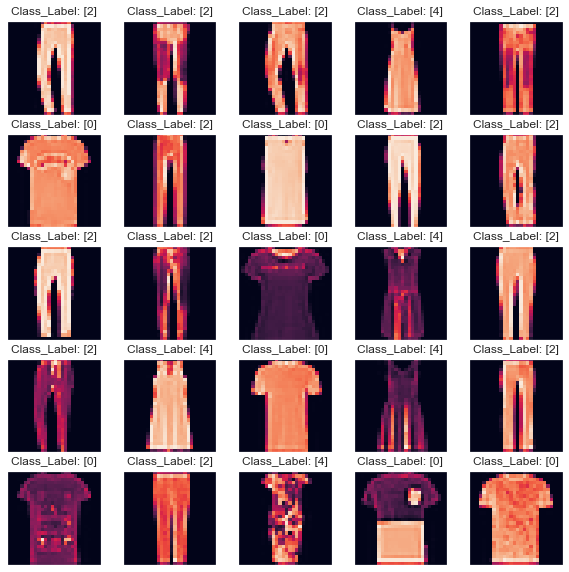

                                 Cluster 4         


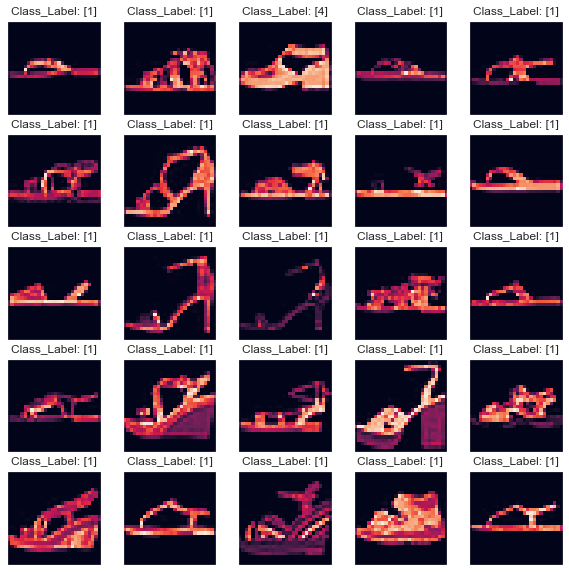

In [122]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(pca1)

print('                                   Cluster 0         ')
cluster_idx = np.where(kmeans.labels_ == 0)[0]
cluster_images = x_test[cluster_idx]
cluster_labels = y_test[cluster_idx]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Class_Label: {cluster_labels[i]}')
    plt.imshow(cluster_images[i])
plt.show()


print('                                 Cluster 1         ')
cluster_idx = np.where(kmeans.labels_ == 1)[0]
cluster_images = x_test[cluster_idx]
cluster_labels = y_test[cluster_idx]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Class_Label: {cluster_labels[i]}')
    plt.imshow(cluster_images[i])
plt.show()

print('                                 Cluster 2         ')
cluster_idx = np.where(kmeans.labels_ == 2)[0]
cluster_images = x_test[cluster_idx]
cluster_labels = y_test[cluster_idx]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Class_Label: {cluster_labels[i]}')
    plt.imshow(cluster_images[i])
plt.show()


print('                                 Cluster 3         ')
cluster_idx = np.where(kmeans.labels_ == 3)[0]
cluster_images = x_test[cluster_idx]
cluster_labels = y_test[cluster_idx]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Class_Label: {cluster_labels[i]}')
    plt.imshow(cluster_images[i])
plt.show()


print('                                 Cluster 4         ')
cluster_idx = np.where(kmeans.labels_ == 4)[0]
cluster_images = x_test[cluster_idx]
cluster_labels = y_test[cluster_idx]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Class_Label: {cluster_labels[i]}')
    plt.imshow(cluster_images[i])
plt.show()


Based on the results of K-Means clustering and visualizations methods we can observe that cluster 4 has almost all images belonging to class label 1, cluster 3 has majority of the images belonging to class 2 and class 0, cluster 2 has majority of images belonging to class 3 and cluster 1 has majority of images belonging to class labels 2 and 4 and cluster 0 has majority of the items belonging to class label 3 and 4.Please note that this was the case when we ran the code. But everytime we run the code the clusters will remain the same but the cluster number will vary. Like for example the current cluster 4 may become cluster 2 and current cluster 2 may become cluster 3 and so on. But the images in the same cluster will remain the same.
Thus cluster 0 seems to be of footwears, cluster 1 seems to be of upper body wear, cluster 2 seems to be of accessories, cluster 3 seems to be of trousers and pants and t-shirts and cluster 4 seems to be of female footwear.